<a href="https://colab.research.google.com/github/antidude900/Deep-Learning-Practise-Projects/blob/main/handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Handwriting Recognition Program**#


##**Setting Up the Data**##


In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
(x,y) = x_train[0].shape
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train = x_train / 255
x_test  = x_test/255

In [6]:
x_train_flat = x_train.reshape(len(x_train),x*y)
x_test_flat = x_test.reshape(len(x_test),x*y)

##**Making the Neural Network**##

In [15]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='sigmoid')
]
)

model.compile(
    optimizer  = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics  = ['accuracy']
)

model.fit(x_train_flat,y_train,epochs = 50)


Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2888 - accuracy: 0.9142
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1394 - accuracy: 0.9594
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1112 - accuracy: 0.9679
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9727
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0795 - accuracy: 0.9766
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0697 - accuracy: 0.9792
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9801
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9825
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9842
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.049

In [8]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9793


[0.0753323882818222, 0.9793000221252441]

In [9]:
y_predict  = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


##**Visually Ayalyzing The Prediction**##


In [10]:
i = 6871

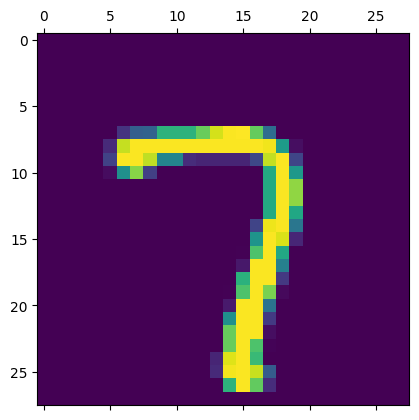

In [11]:
plt.matshow(x_test[i])

In [12]:
np.argmax(y_predict[i])

7

In [18]:
y_predicted = [np.argmax(x) for x in y_predict]

Text(95.72222222222221, 0.5, 'Truth')

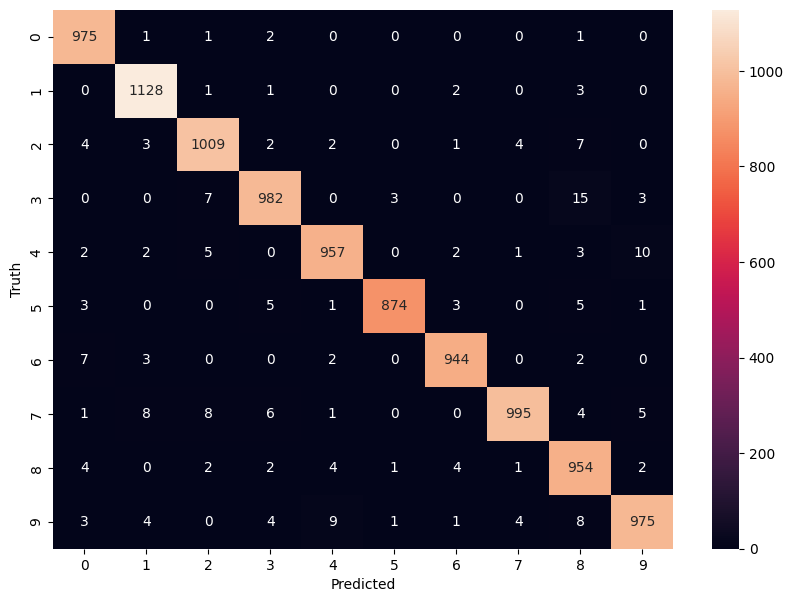

In [20]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")